In [1]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("aer_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [2]:
df = pd.read_csv('FM Monte Carlo 4x4p iterations FM starting point aer_simulator.csv')
df

,Unnamed: 0,temp=0.01,temp=2.8664285714285715,temp=5.722857142857143,temp=8.579285714285716,temp=11.435714285714287,temp=14.292142857142858,temp=17.148571428571433,temp=20.005000000000003,temp=22.861428571428576,temp=25.71785714285715,temp=28.57428571428572,temp=31.43071428571429,temp=34.28714285714286,temp=37.143571428571434,temp=40.0
0,0,1.0,0.875,1.000,1.000,1.000,1.000,0.875,1.000,1.000,1.000,1.000,0.875,1.000,1.000,1.000
1,1,1.0,0.750,0.875,0.750,0.750,0.875,0.875,0.875,0.875,0.750,0.875,0.875,0.875,0.875,0.875
2,2,1.0,0.750,0.750,0.750,0.875,0.875,0.750,0.750,0.875,0.875,0.750,0.750,0.875,0.875,0.875
3,3,1.0,0.750,0.750,0.750,0.750,0.750,0.875,0.750,0.875,0.750,0.750,0.875,0.875,0.875,0.875
4,4,1.0,0.750,0.875,0.750,0.750,0.875,0.750,0.875,1.000,0.875,0.875,0.875,0.750,0.875,0.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.0,0.750,0.750,0.750,0.750,0.875,0.875,0.750,0.750,1.000,0.750,0.750,0.875,0.750,0.875
9996,9996,1.0,0.875,0.750,0.750,0.750,0.875,0.875,0.875,0.750,0.875,0.750,0.875,0.875,0.875,0.875
9997,9997,1.0,0.750,0.750,0.875,0.875,0.875,0.875,0.875,0.750,0.750,0.875,0.875,0.875,0.750,0.875
9998,9998,1.0,0.750,0.750,1.000,0.875,0.750,0.875,0.750,0.875,0.750,0.875,0.875,0.875,0.875,1.000


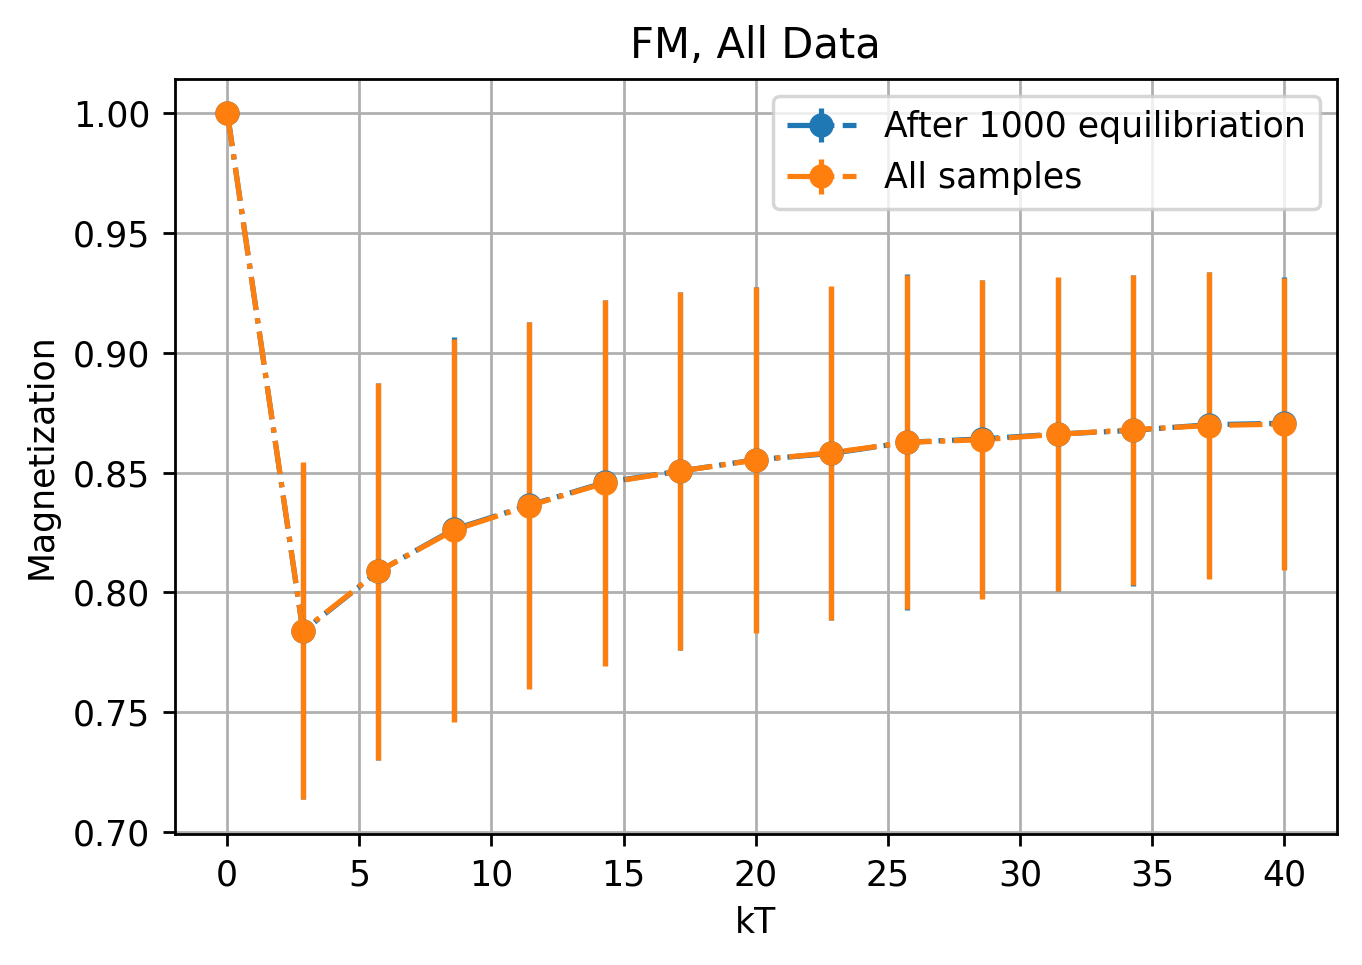

In [3]:
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('FM, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

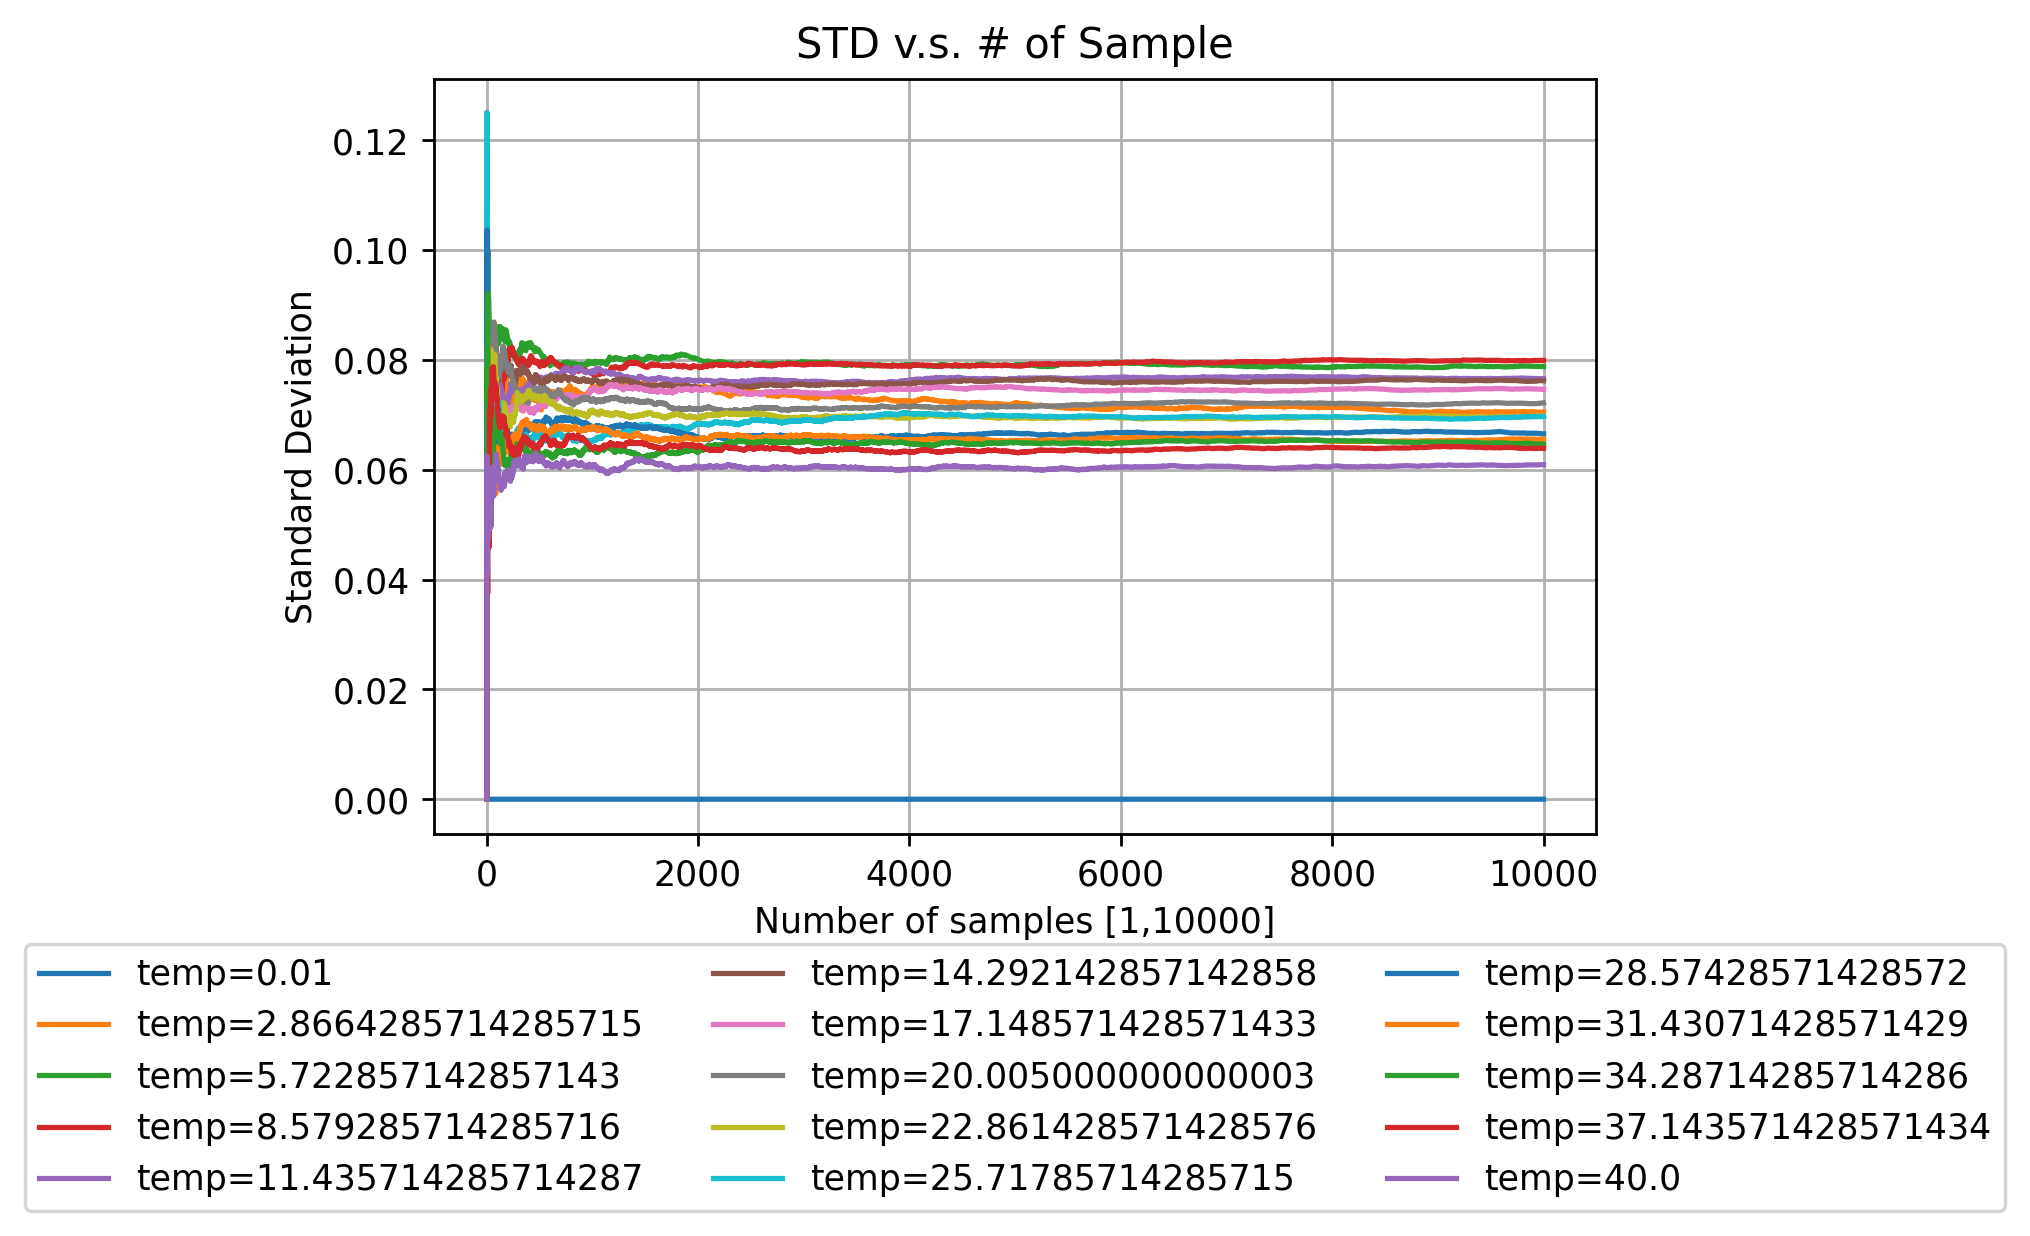

In [4]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

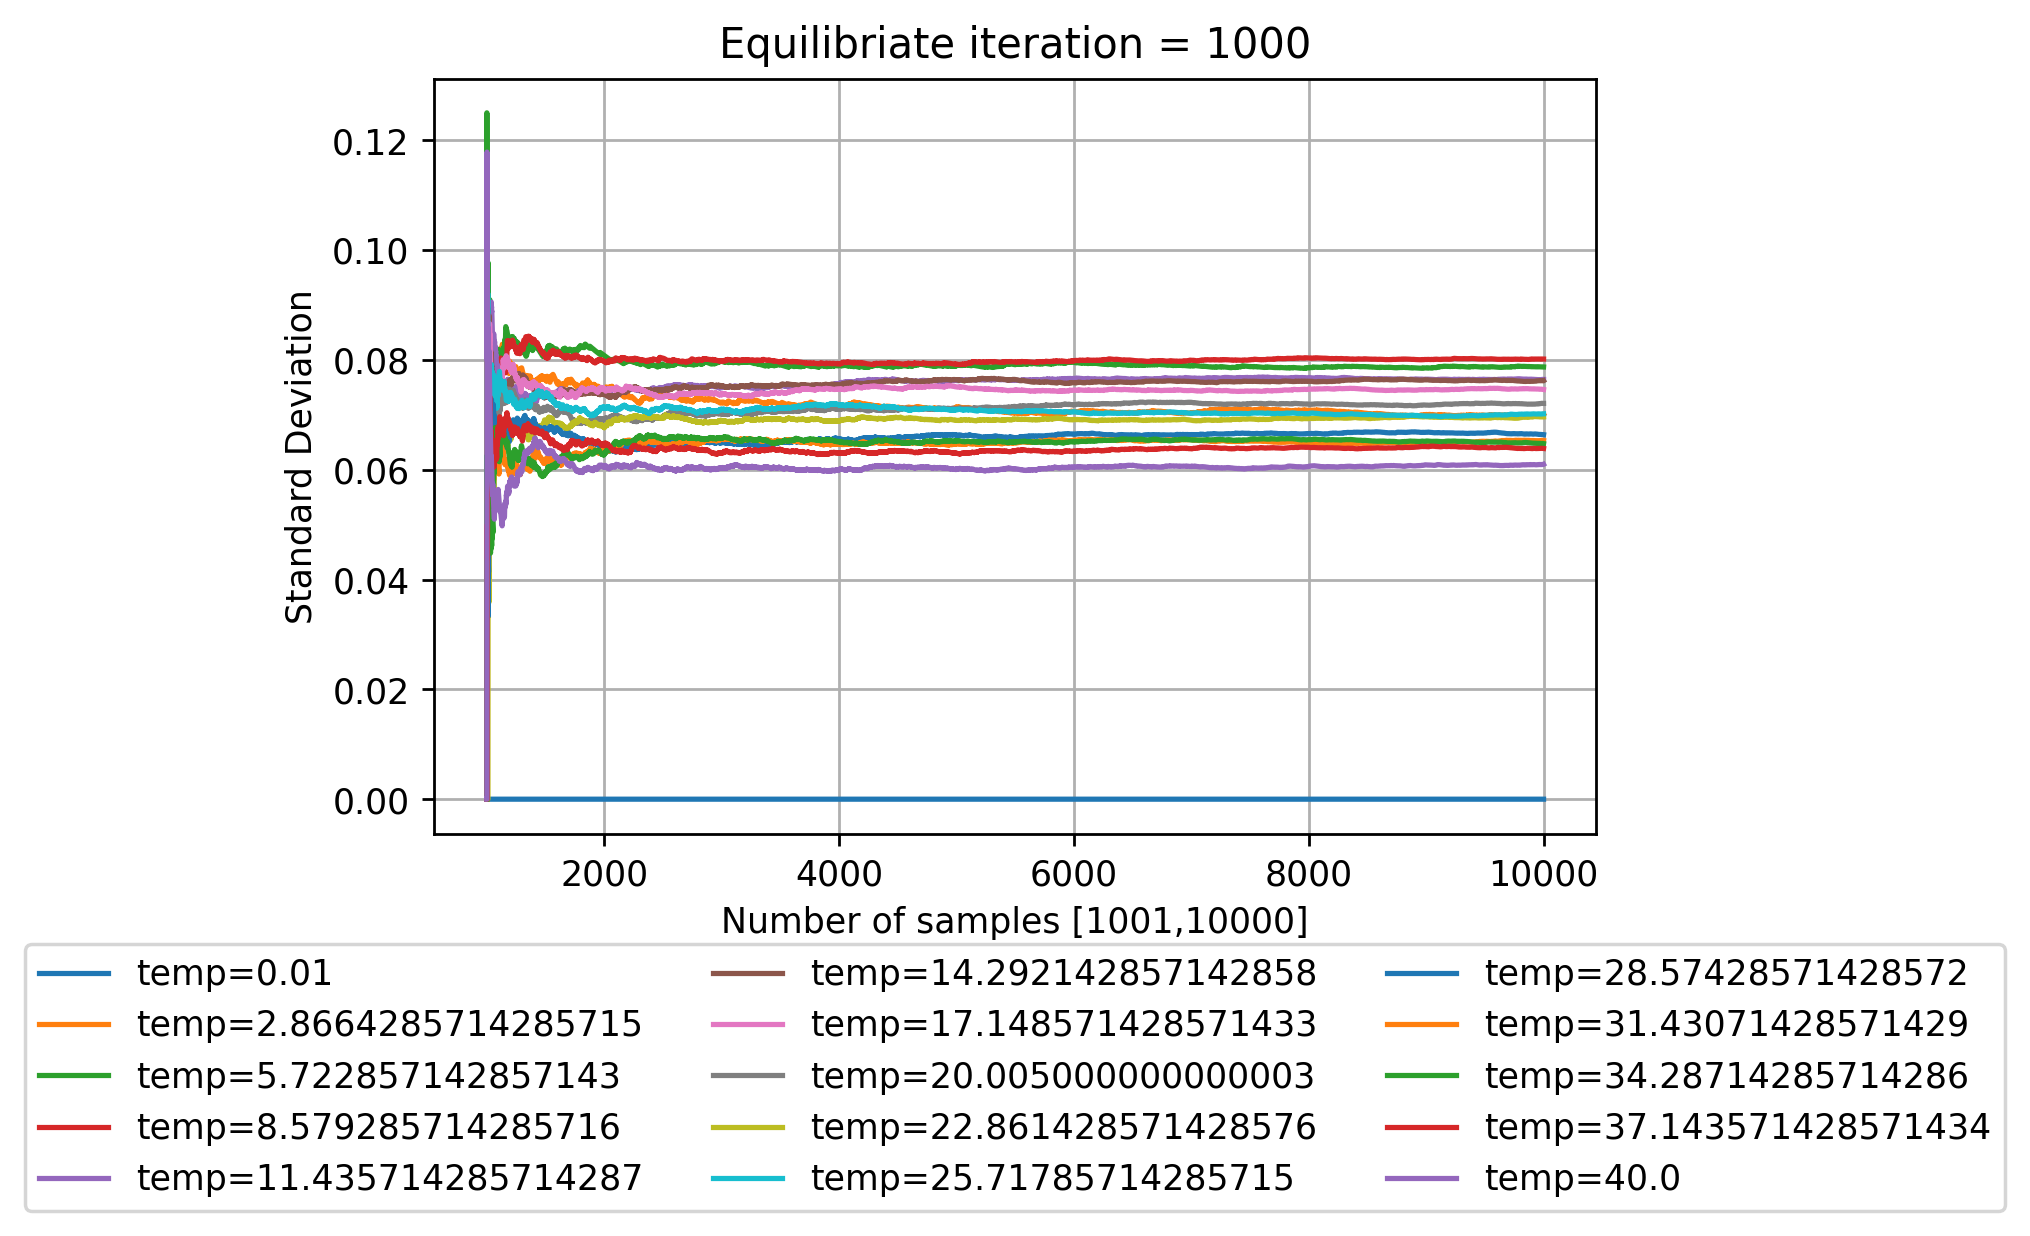

In [5]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb+1, 10000, 10000-eqlb).astype('int64')
for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[eqlb:i]) for i in samples]
    plt.plot(samples, std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

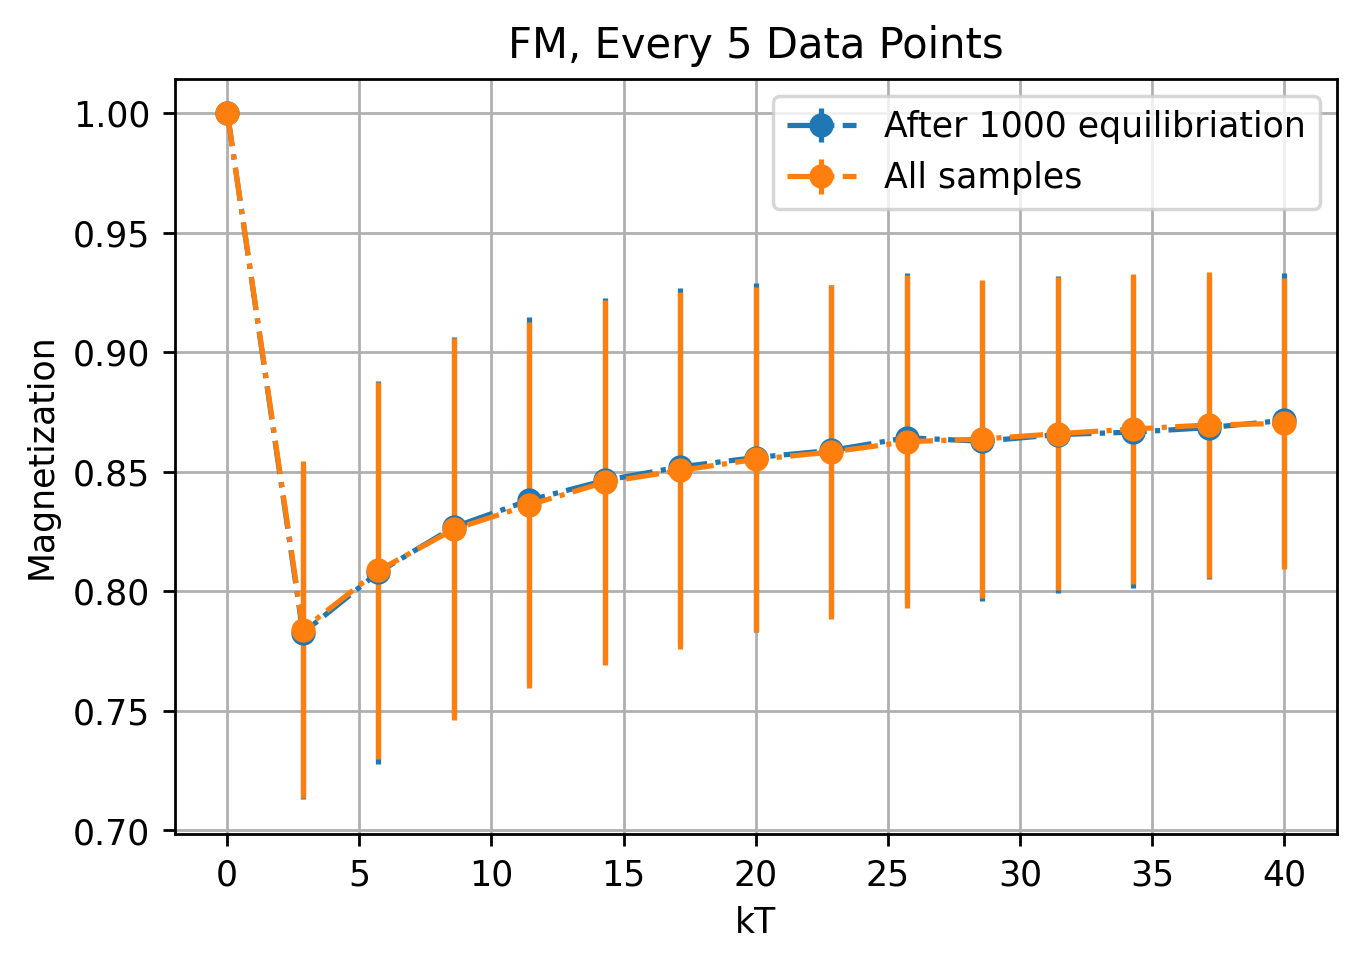

In [6]:
# Every 5th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::5]))
    std.append(np.std(df[key][eqlb::5]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('FM, Every 5 Data Points')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


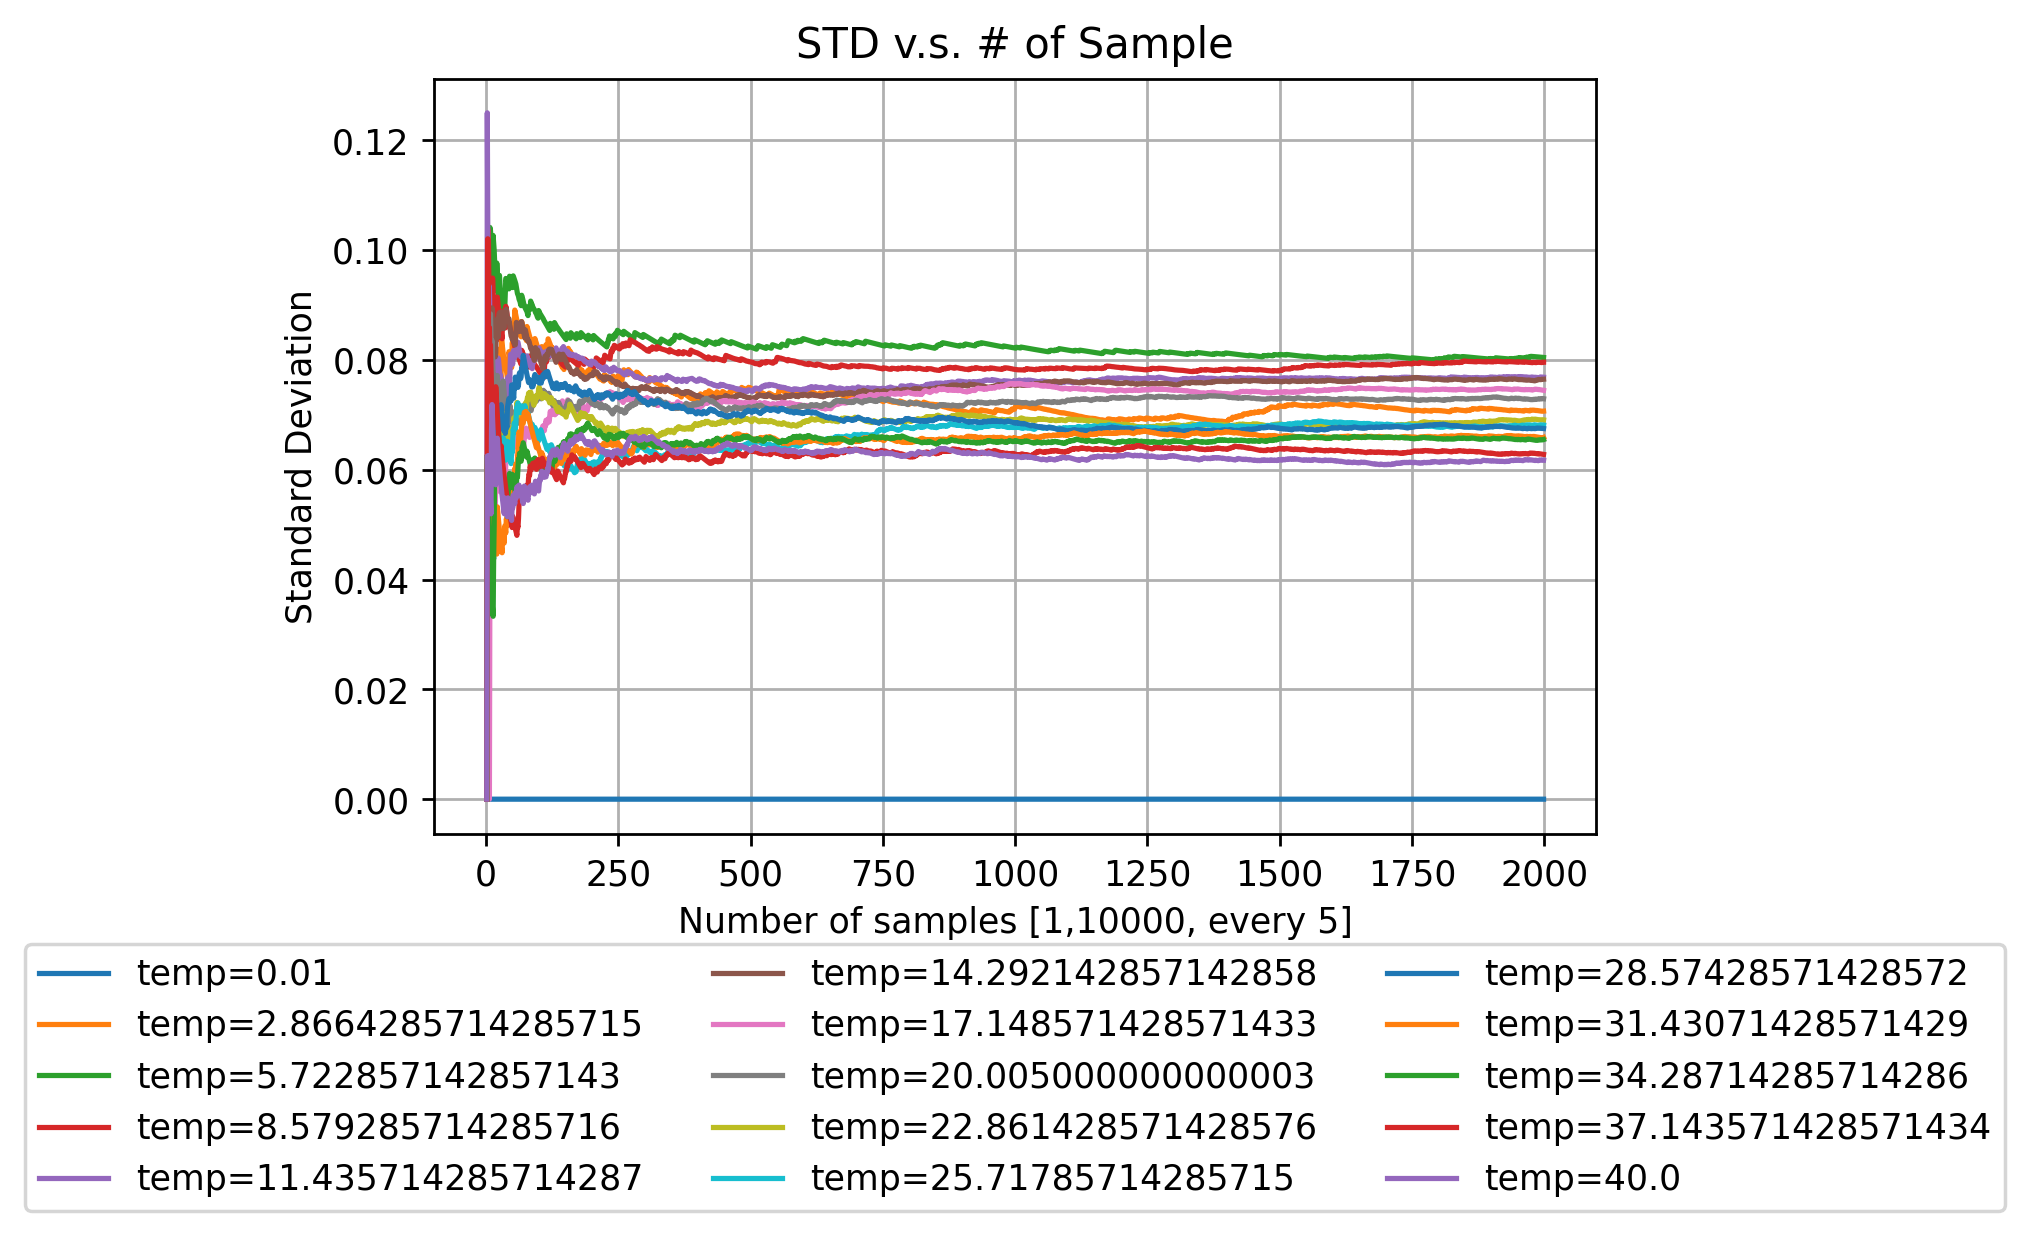

In [7]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::5].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

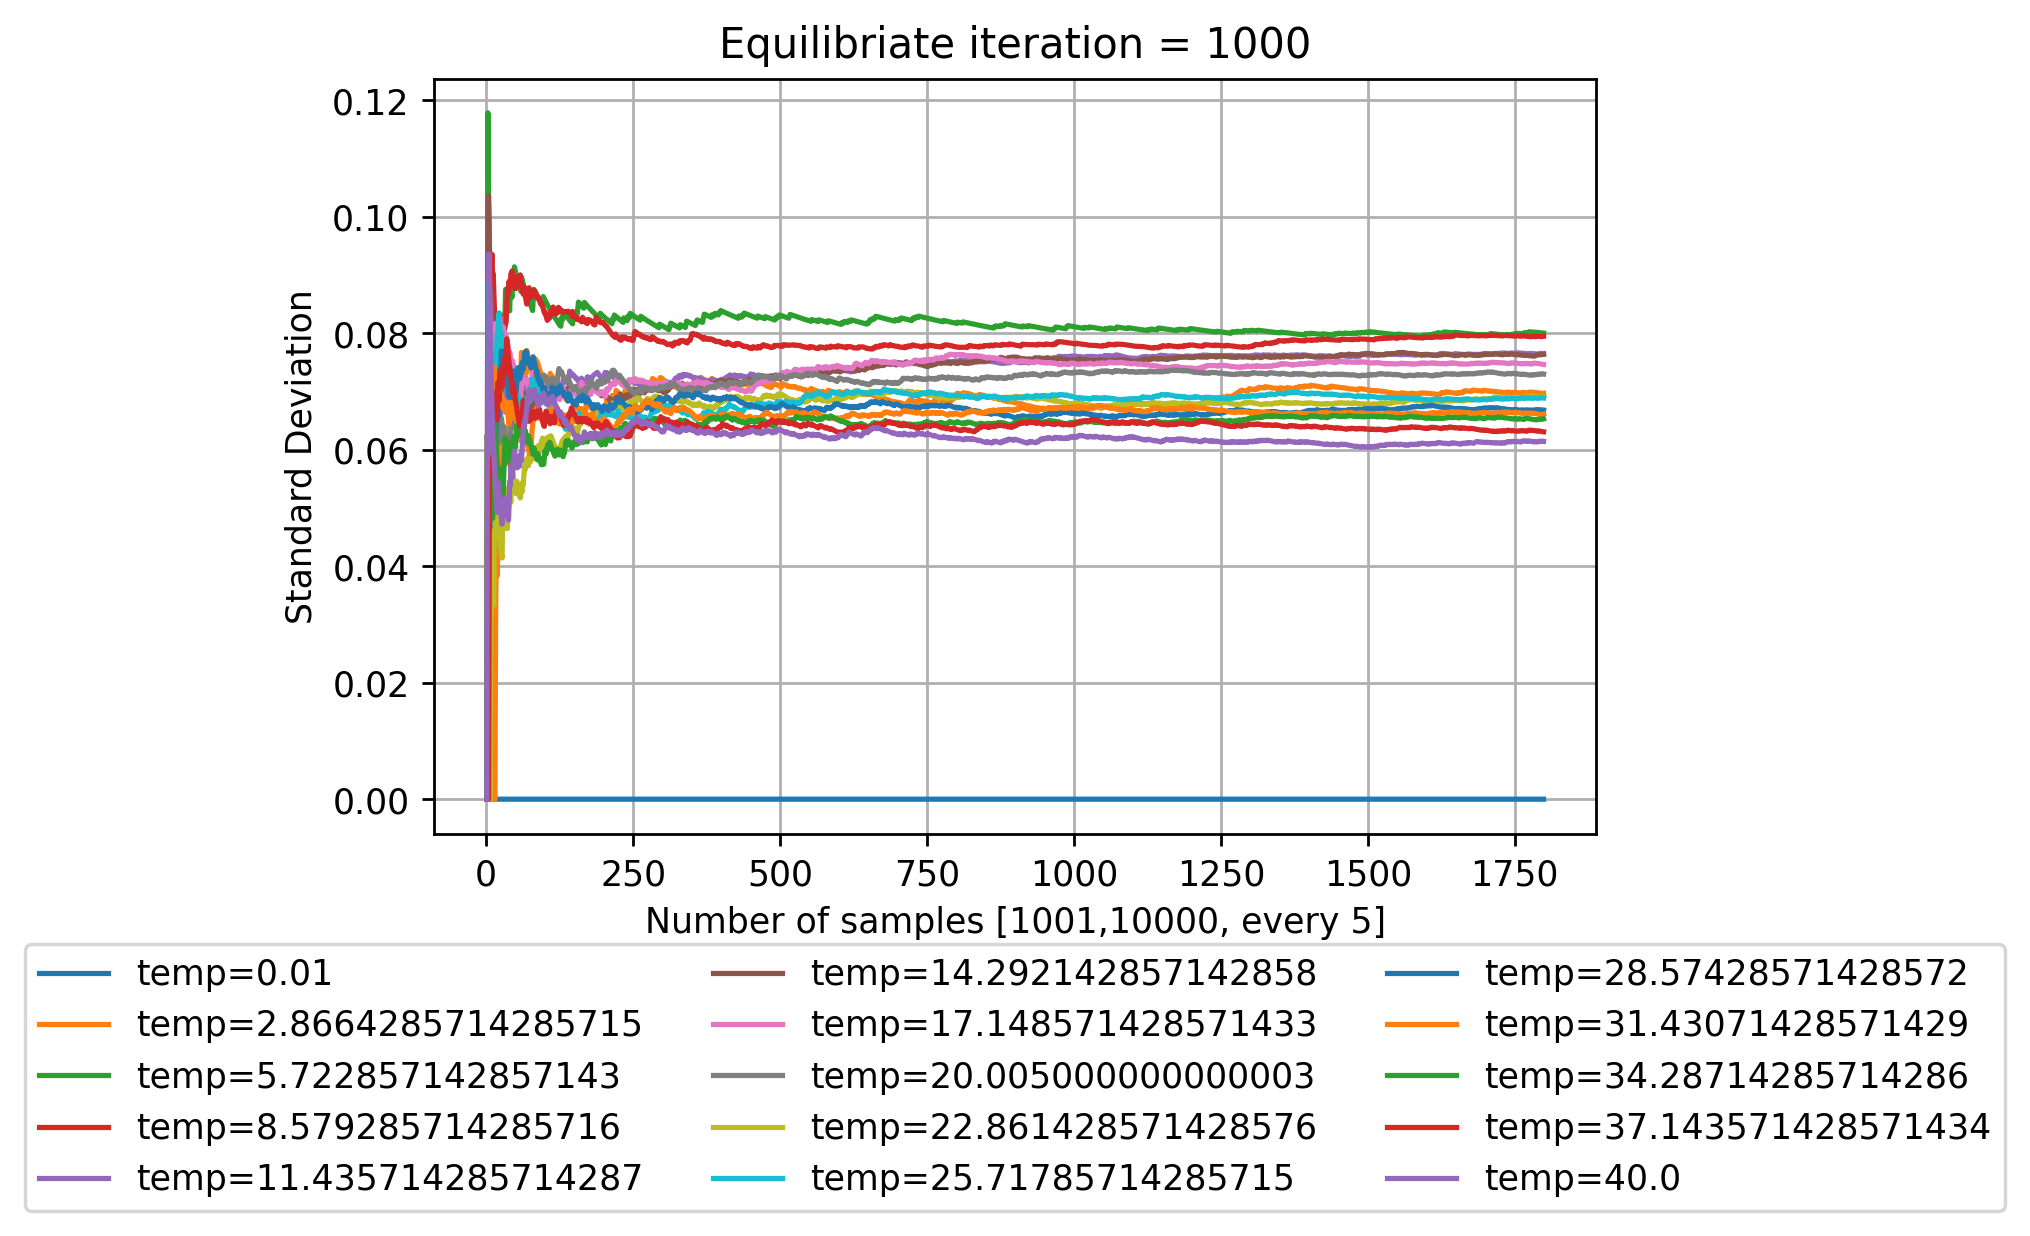

In [24]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::5].tolist()
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

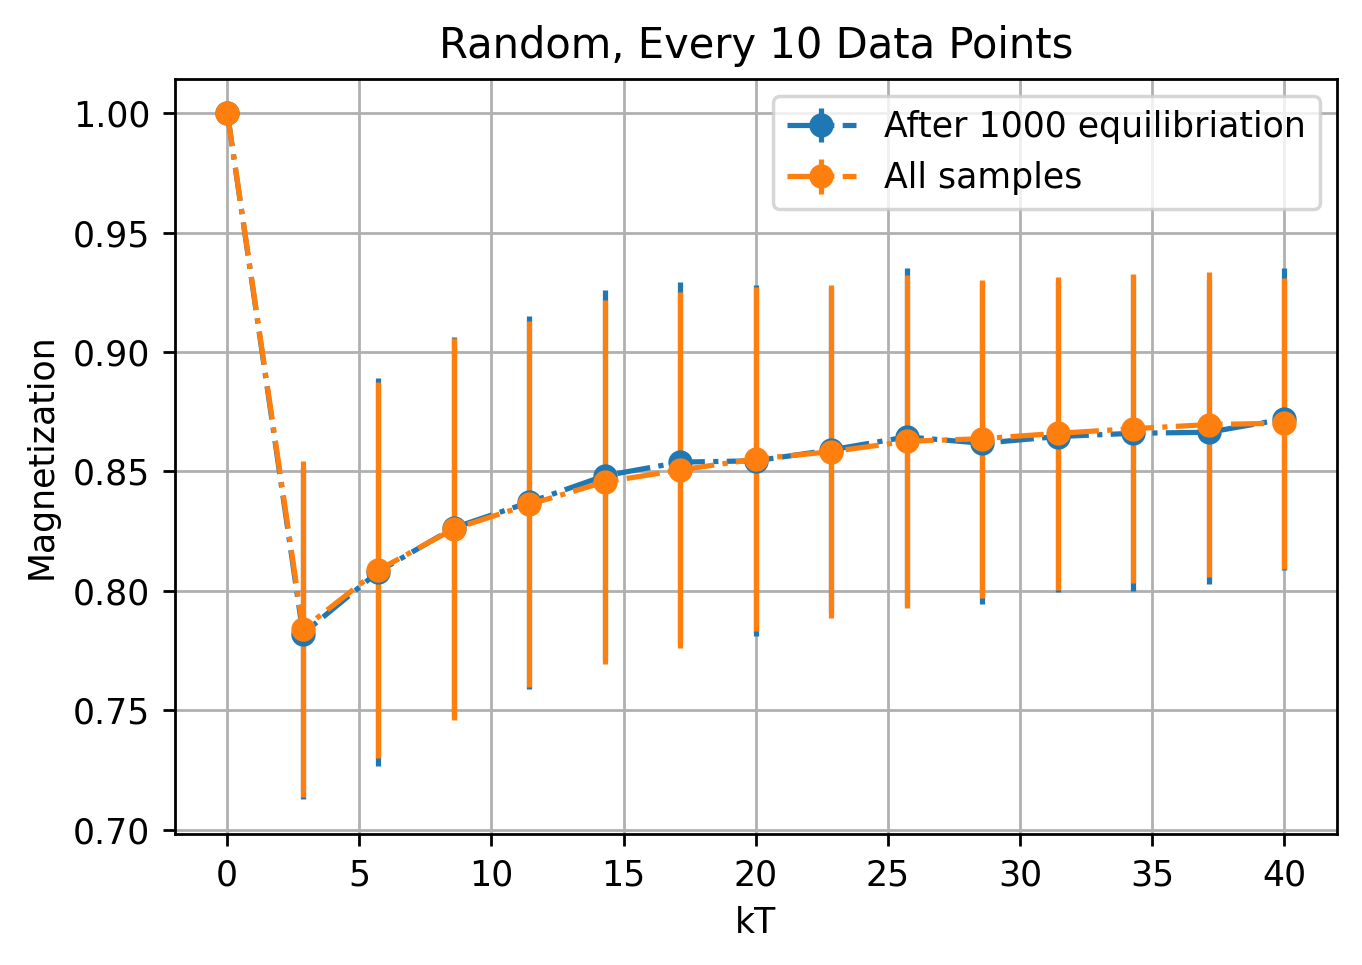

In [21]:
# Every 10th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::10]))
    std.append(np.std(df[key][eqlb::10]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, Every 10 Data Points')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

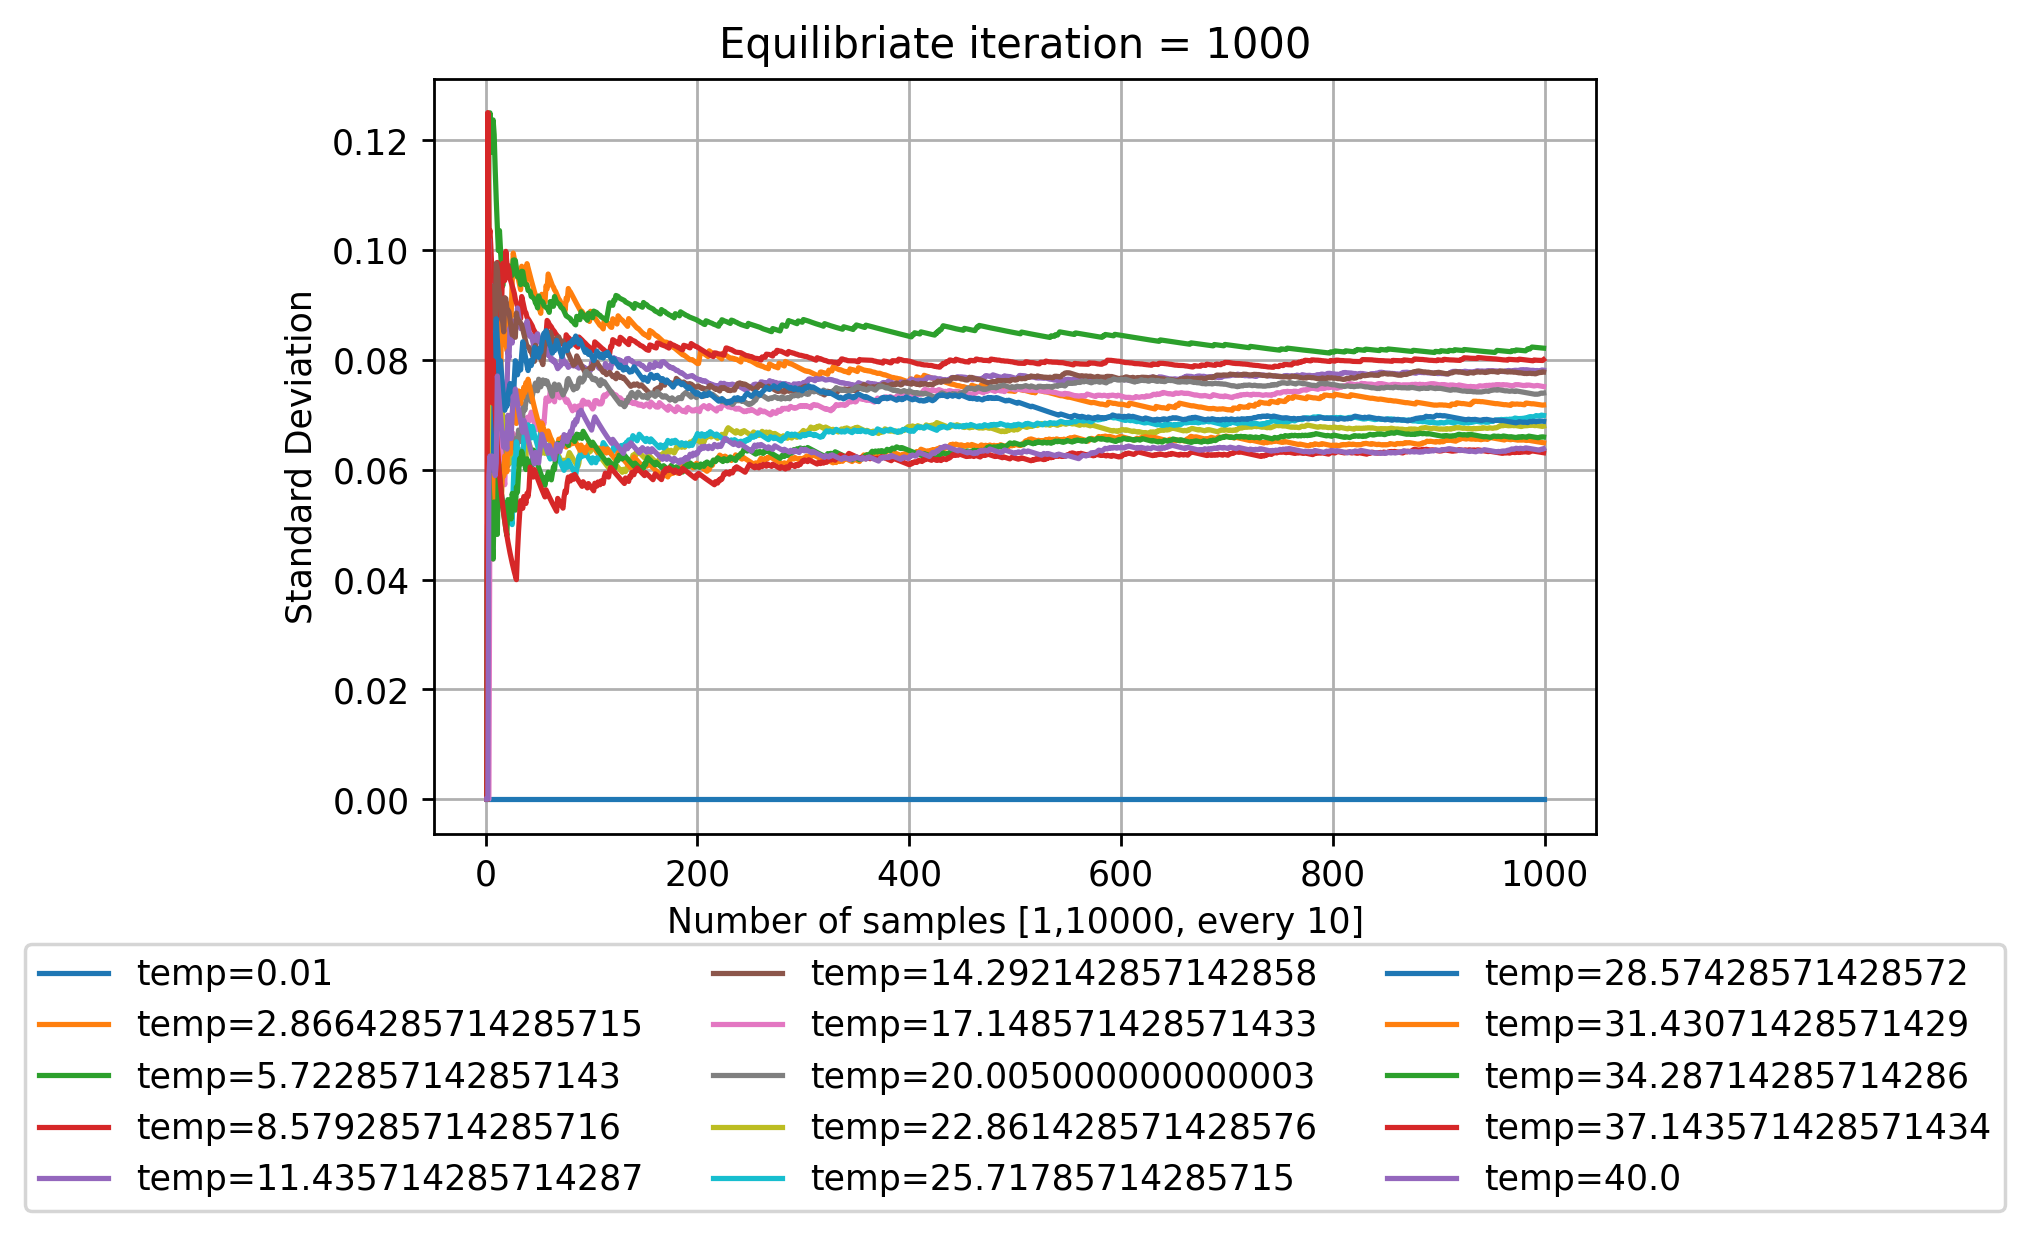

In [22]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::10]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

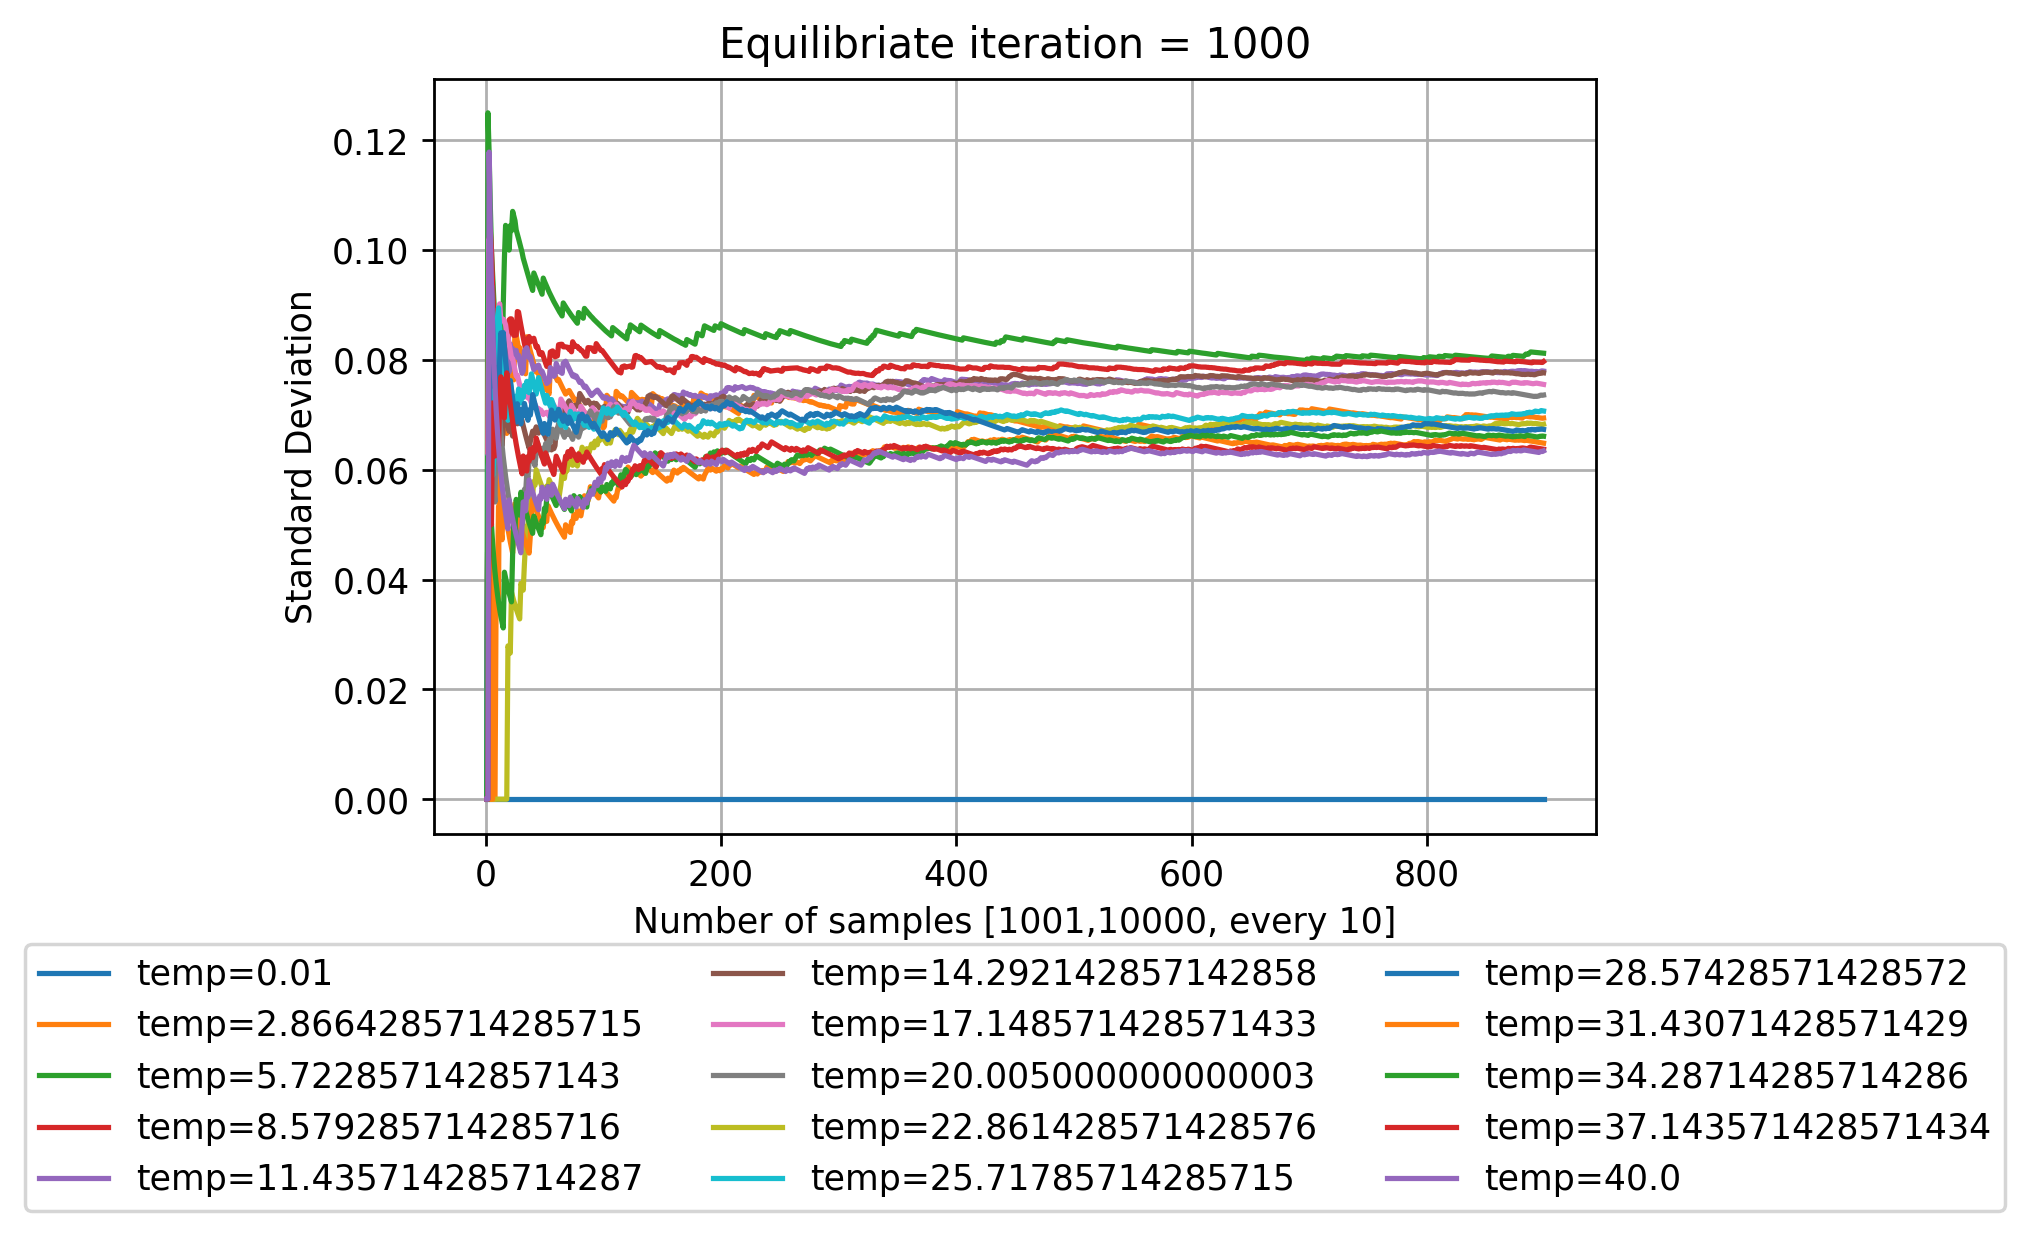

In [25]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::10].tolist()
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

In [13]:
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::10]
samples

array([1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100,
       1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180, 1190, 1200, 1210,
       1220, 1230, 1240, 1250, 1260, 1270, 1280, 1290, 1300, 1310, 1320,
       1330, 1340, 1350, 1360, 1370, 1380, 1390, 1400, 1410, 1420, 1430,
       1440, 1450, 1460, 1470, 1480, 1490, 1500, 1510, 1520, 1530, 1540,
       1550, 1560, 1570, 1580, 1590, 1600, 1610, 1620, 1630, 1640, 1650,
       1660, 1670, 1680, 1690, 1700, 1710, 1720, 1730, 1740, 1750, 1760,
       1770, 1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870,
       1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,
       1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090,
       2100, 2110, 2120, 2130, 2140, 2150, 2160, 2170, 2180, 2190, 2200,
       2210, 2220, 2230, 2240, 2250, 2260, 2270, 2280, 2290, 2300, 2310,
       2320, 2330, 2340, 2350, 2360, 2370, 2380, 2390, 2400, 2410, 2420,
       2430, 2440, 2450, 2460, 2470, 2480, 2490, 25

In [ ]:
temp_data = df[key]
temp_data = temp_data[samples]
temp_data.tolist()